# Let's just look at flowers data for a little bit

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dataset import iris_dataframe, iris_dataframe_split, CLS_NAME, COLORS_PER_CLS

In [2]:
# Always seed your flowers!
np.random.seed(0xDEADBEEF)

In [3]:
data, features = iris_dataframe()
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

In [4]:
train, test = iris_dataframe_split(data) # performs a random shuffle and gives us a split
train

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
94                 5.6               2.7                4.2               1.3   
132                6.4               2.8                5.6               2.2   
49                 5.0               3.3                1.4               0.2   
115                6.4               3.2                5.3               2.3   
99                 5.7               2.8                4.1               1.3   
..                 ...               ...                ...               ...   
143                6.8               3.2                5.9               2.3   
77                 6.7               3.0                5.0               1.7   
17                 5.1               3.5                1.4               0.3   
75                 6.6               3.0                4.4               1.4   
70                 5.9               3.2                4.8               1.8   

     class  
94       1  
132      2  
49       0  
115      2  
99       1  
..     ...  
143      2  
77       1  
17       0  
75       1  
70       1  

[105 rows x 5 columns]

There's not much data in there 😅. We'll have to manage it

In [5]:
train_by_cls = [train[train["class"] == i] for i in range(3)]

In [6]:
def plot_flower_info(part):
    plt.figure()
    plt.title(f"{part.capitalize()} size information")
    plt.xlabel("Length")
    plt.ylabel("Width")
    for class_idx, class_data in enumerate(train_by_cls):
        l = class_data[f"{part} length (cm)"]
        w = class_data[f"{part} width (cm)"]
        plt.scatter(l, w, c=COLORS_PER_CLS[class_idx], label=f"Class {CLS_NAME[class_idx]}")
    
    plt.legend()
    
    return plt.show()

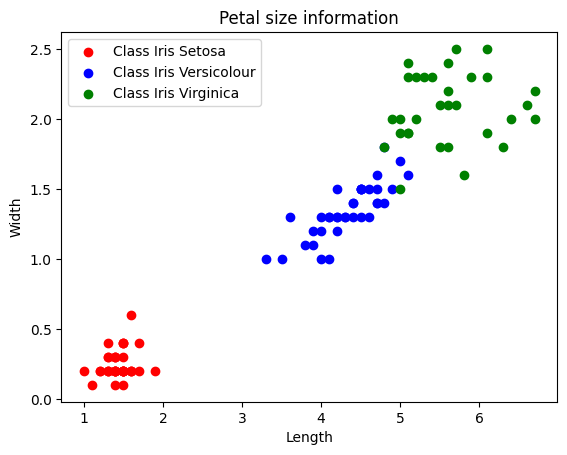

In [7]:
plot_flower_info("petal")

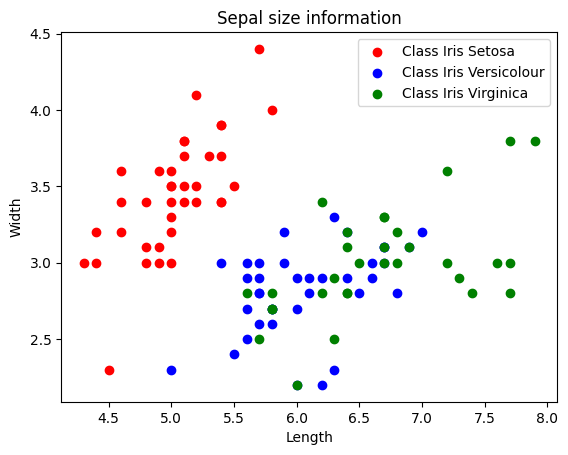

In [8]:
plot_flower_info("sepal")

Looking at the data alone, it looks like petal size might be enough to build a linear classifier. We could build a separation between virginica and the rest, and add another level to split versicolour. It's also possible there is a correlation between sepal and petal size which might allow greater separation of individual samples (thus combining the two graphs. never throw information away!). Let's look at correlation.

/tmp/ipykernel_5038/2026669477.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+features)


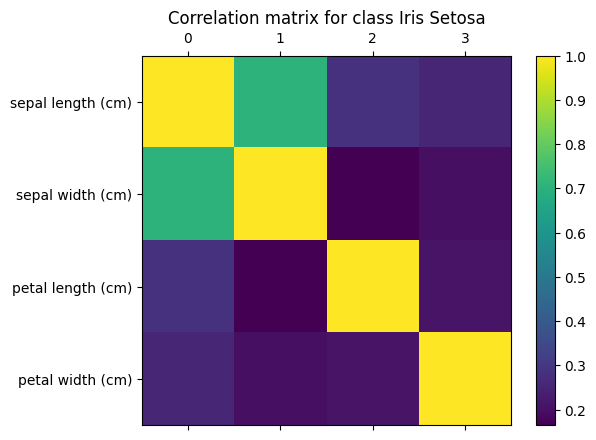

/tmp/ipykernel_5038/2026669477.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+features)


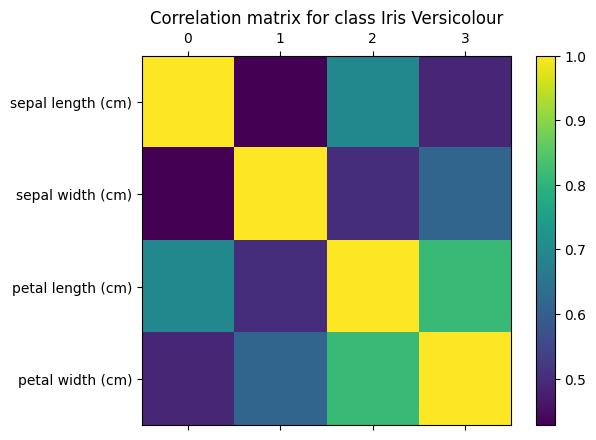

/tmp/ipykernel_5038/2026669477.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+features)


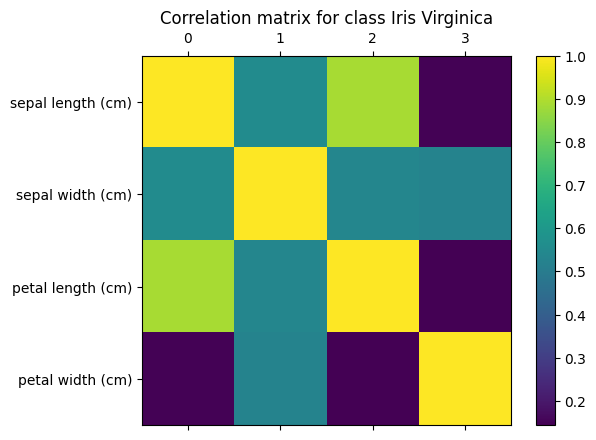

In [21]:
for class_idx, class_data in enumerate(train_by_cls):
    columns_with_data = class_data[features]
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.title.set_text(f"Correlation matrix for class {CLS_NAME[class_idx]}")
    cax = ax.matshow(columns_with_data.corr())
    fig.colorbar(cax)

    ax.set_yticklabels(['']+features)
    plt.show()

It does look like there is some correlation between petal and sepal length for **some** flowers, which might help us with creating a model. We'll plug everything in a neural net and call it a day.